# Temperature Forecast

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:
    
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import scikitplot as skplt

In [2]:
data=pd.read_csv('temperature.csv')
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In this data we have some value so i need to fill them

In [4]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We have all the float column no object column is there

In [6]:
!pip install reverse_geocoder

  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268087 sha256=4eabac7f905a2caab87500db8785729b91dd4c080d6c7aba0f2e1c93bda4b79c
  Stored in directory: c:\users\dks_m\appdata\local\pip\cache\wheels\48\1e\42\7cda53ab4a7e6de12338278897c6d4dbab7c037989efdb277c
Successfully built reverse-geocoder


In [7]:
import reverse_geocoder as rg
import pprint
data00=[]
def reverseGeocode(coordinates):
    result=rg.search(coordinates)
    return (result)
if __name__=="__main__":
    coordinates=list(zip(data['lat'],data['lon']))
    data12=reverseGeocode(coordinates)
    data00.append(data12)

new_data=pd.DataFrame(data00).transpose()

Loading formatted geocoded file...


I have converted all the latitude and longitude of data into real city and state

# Feature Engineering

In [8]:
data['state']=new_data[0].apply(lambda x:x.get('admin1'))

data['City']=new_data[0].apply(lambda x:x.get('name'))

In [9]:
data.drop(['lat','lon'],axis=1,inplace=True)

Dropping lat and lon column because i have there real city name

<b>Converting date into Year. Month, Day</b>

In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
data['Year']=data['Date'].dt.year

In [12]:
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day

In [13]:
#Dropping date column because dont need it as already converted date in year, month, day seperately.
data.drop(['Date'],axis=1,inplace=True)

In [14]:
data

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,state,City,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.785000,5992.895996,29.1,21.2,Seoul,Seoul,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.514100,5869.312500,30.5,22.5,Seoul,Seoul,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.266100,5863.555664,31.1,23.9,Seoul,Seoul,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.534800,5856.964844,31.7,24.3,Seoul,Seoul,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.505500,5859.552246,31.2,22.5,Gyeonggi-do,Guri-si,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,15.5876,0.155400,4443.313965,28.3,18.1,Gyeonggi-do,Kwangmyong,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,17.2956,0.222300,4438.373535,28.6,18.8,Gyeonggi-do,Kwangmyong,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,19.5844,0.271300,4451.345215,27.8,17.4,Seoul,Seoul,2017.0,8.0,30.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,12.3700,0.098475,4329.520508,17.4,11.3,Gyeonggi-do,Kwangmyong,NaN,NaN,NaN


In [15]:
{column:len(data[column].unique()) for column in data.columns if data[column].dtypes=='float64'}

{'station': 26,
 'Present_Tmax': 168,
 'Present_Tmin': 156,
 'LDAPS_RHmin': 7673,
 'LDAPS_RHmax': 7665,
 'LDAPS_Tmax_lapse': 7676,
 'LDAPS_Tmin_lapse': 7676,
 'LDAPS_WS': 7676,
 'LDAPS_LH': 7676,
 'LDAPS_CC1': 7570,
 'LDAPS_CC2': 7583,
 'LDAPS_CC3': 7600,
 'LDAPS_CC4': 7525,
 'LDAPS_PPT1': 2813,
 'LDAPS_PPT2': 2511,
 'LDAPS_PPT3': 2357,
 'LDAPS_PPT4': 1919,
 'DEM': 25,
 'Slope': 27,
 'Solar radiation': 1575,
 'Next_Tmax': 184,
 'Next_Tmin': 158,
 'Year': 6,
 'Month': 13,
 'Day': 22}

checking which column have how many unique values so i can perform countplot on them

In [16]:
col=['DEM','Day','Month','Slope','Year','station']

# Univariate Analysis

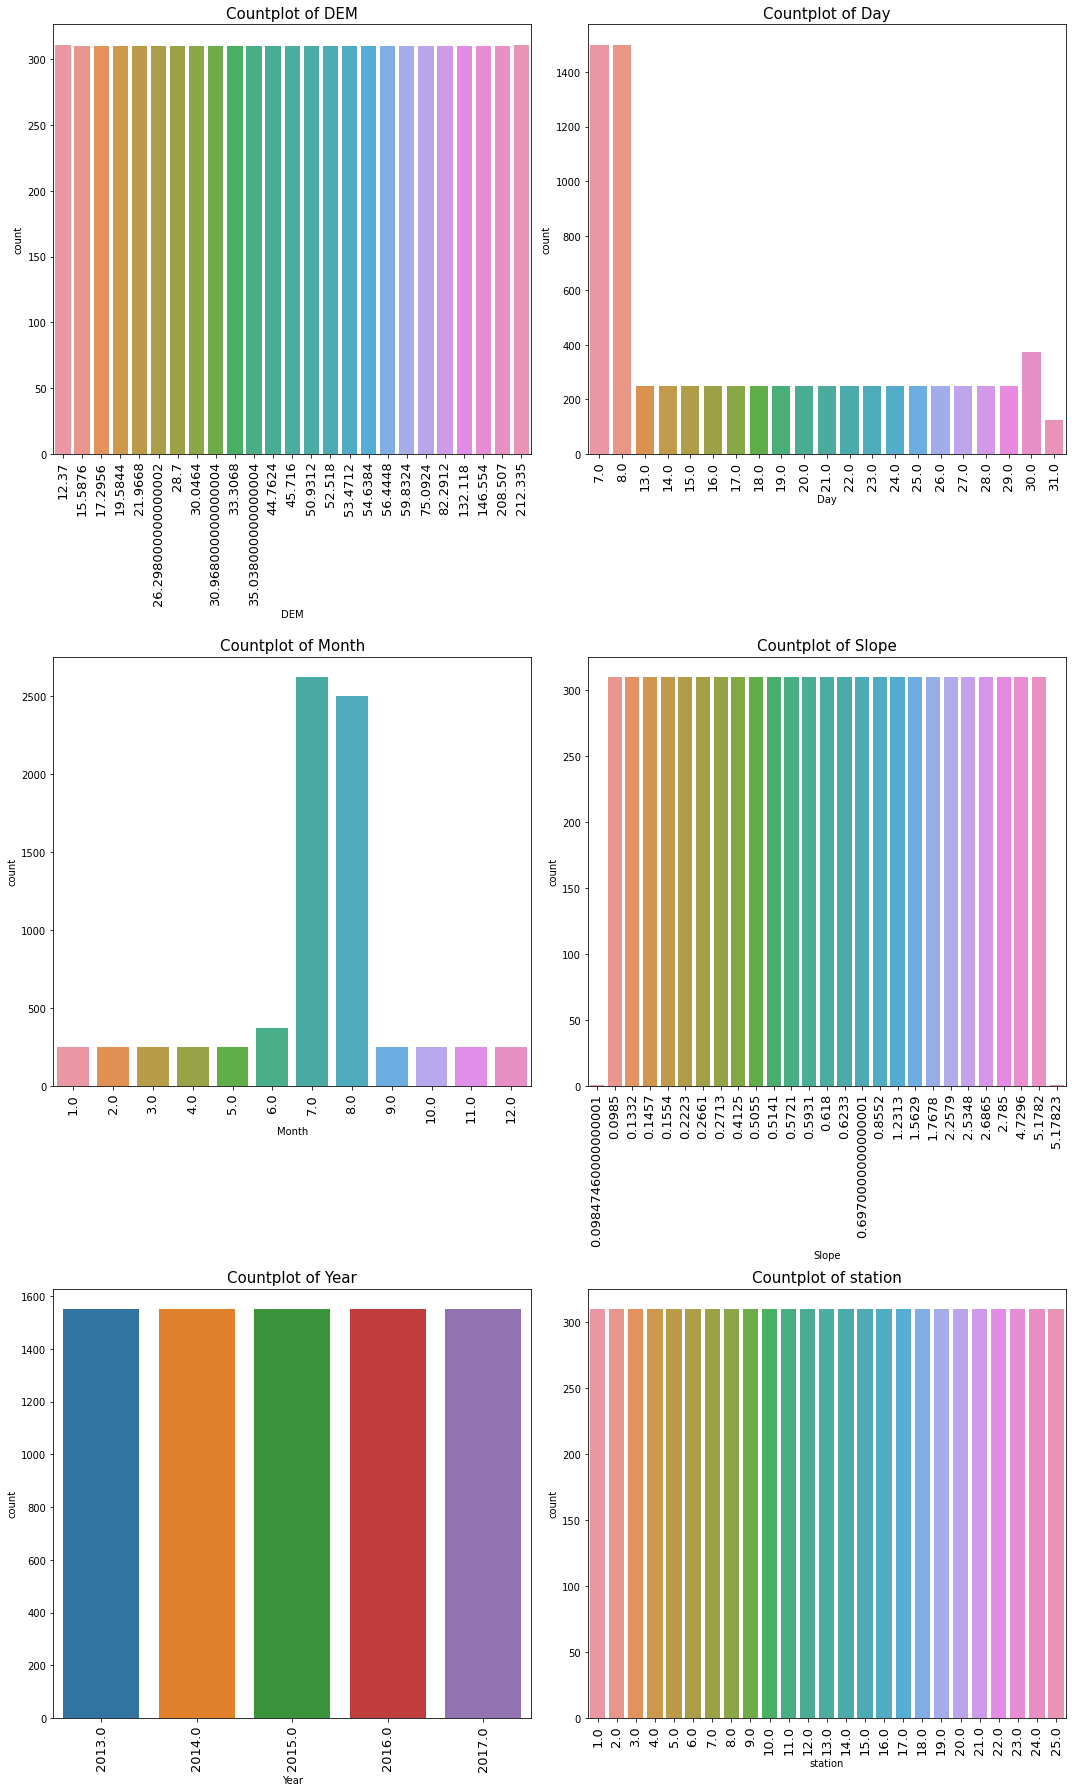

In [17]:
plt.figure(figsize=(15,25))
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    sns.countplot(data[col[i]])
    plt.title(f"Countplot of {col[i]}",fontsize=15)
    plt.xticks(rotation=90,fontsize=13)
    plt.tight_layout()

# Obseravtion

1-From Day feature i can say 7 and 8 day of every month has high count as compare to other

2-From month i can say 7, 8 month has the high count as compare to other

3-For rest of the columns i can say they have a uniform distribution so no obseravtion from them

In [18]:
data.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'state', 'City', 'Year',
       'Month', 'Day'],
      dtype='object')

In [19]:
col1=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']

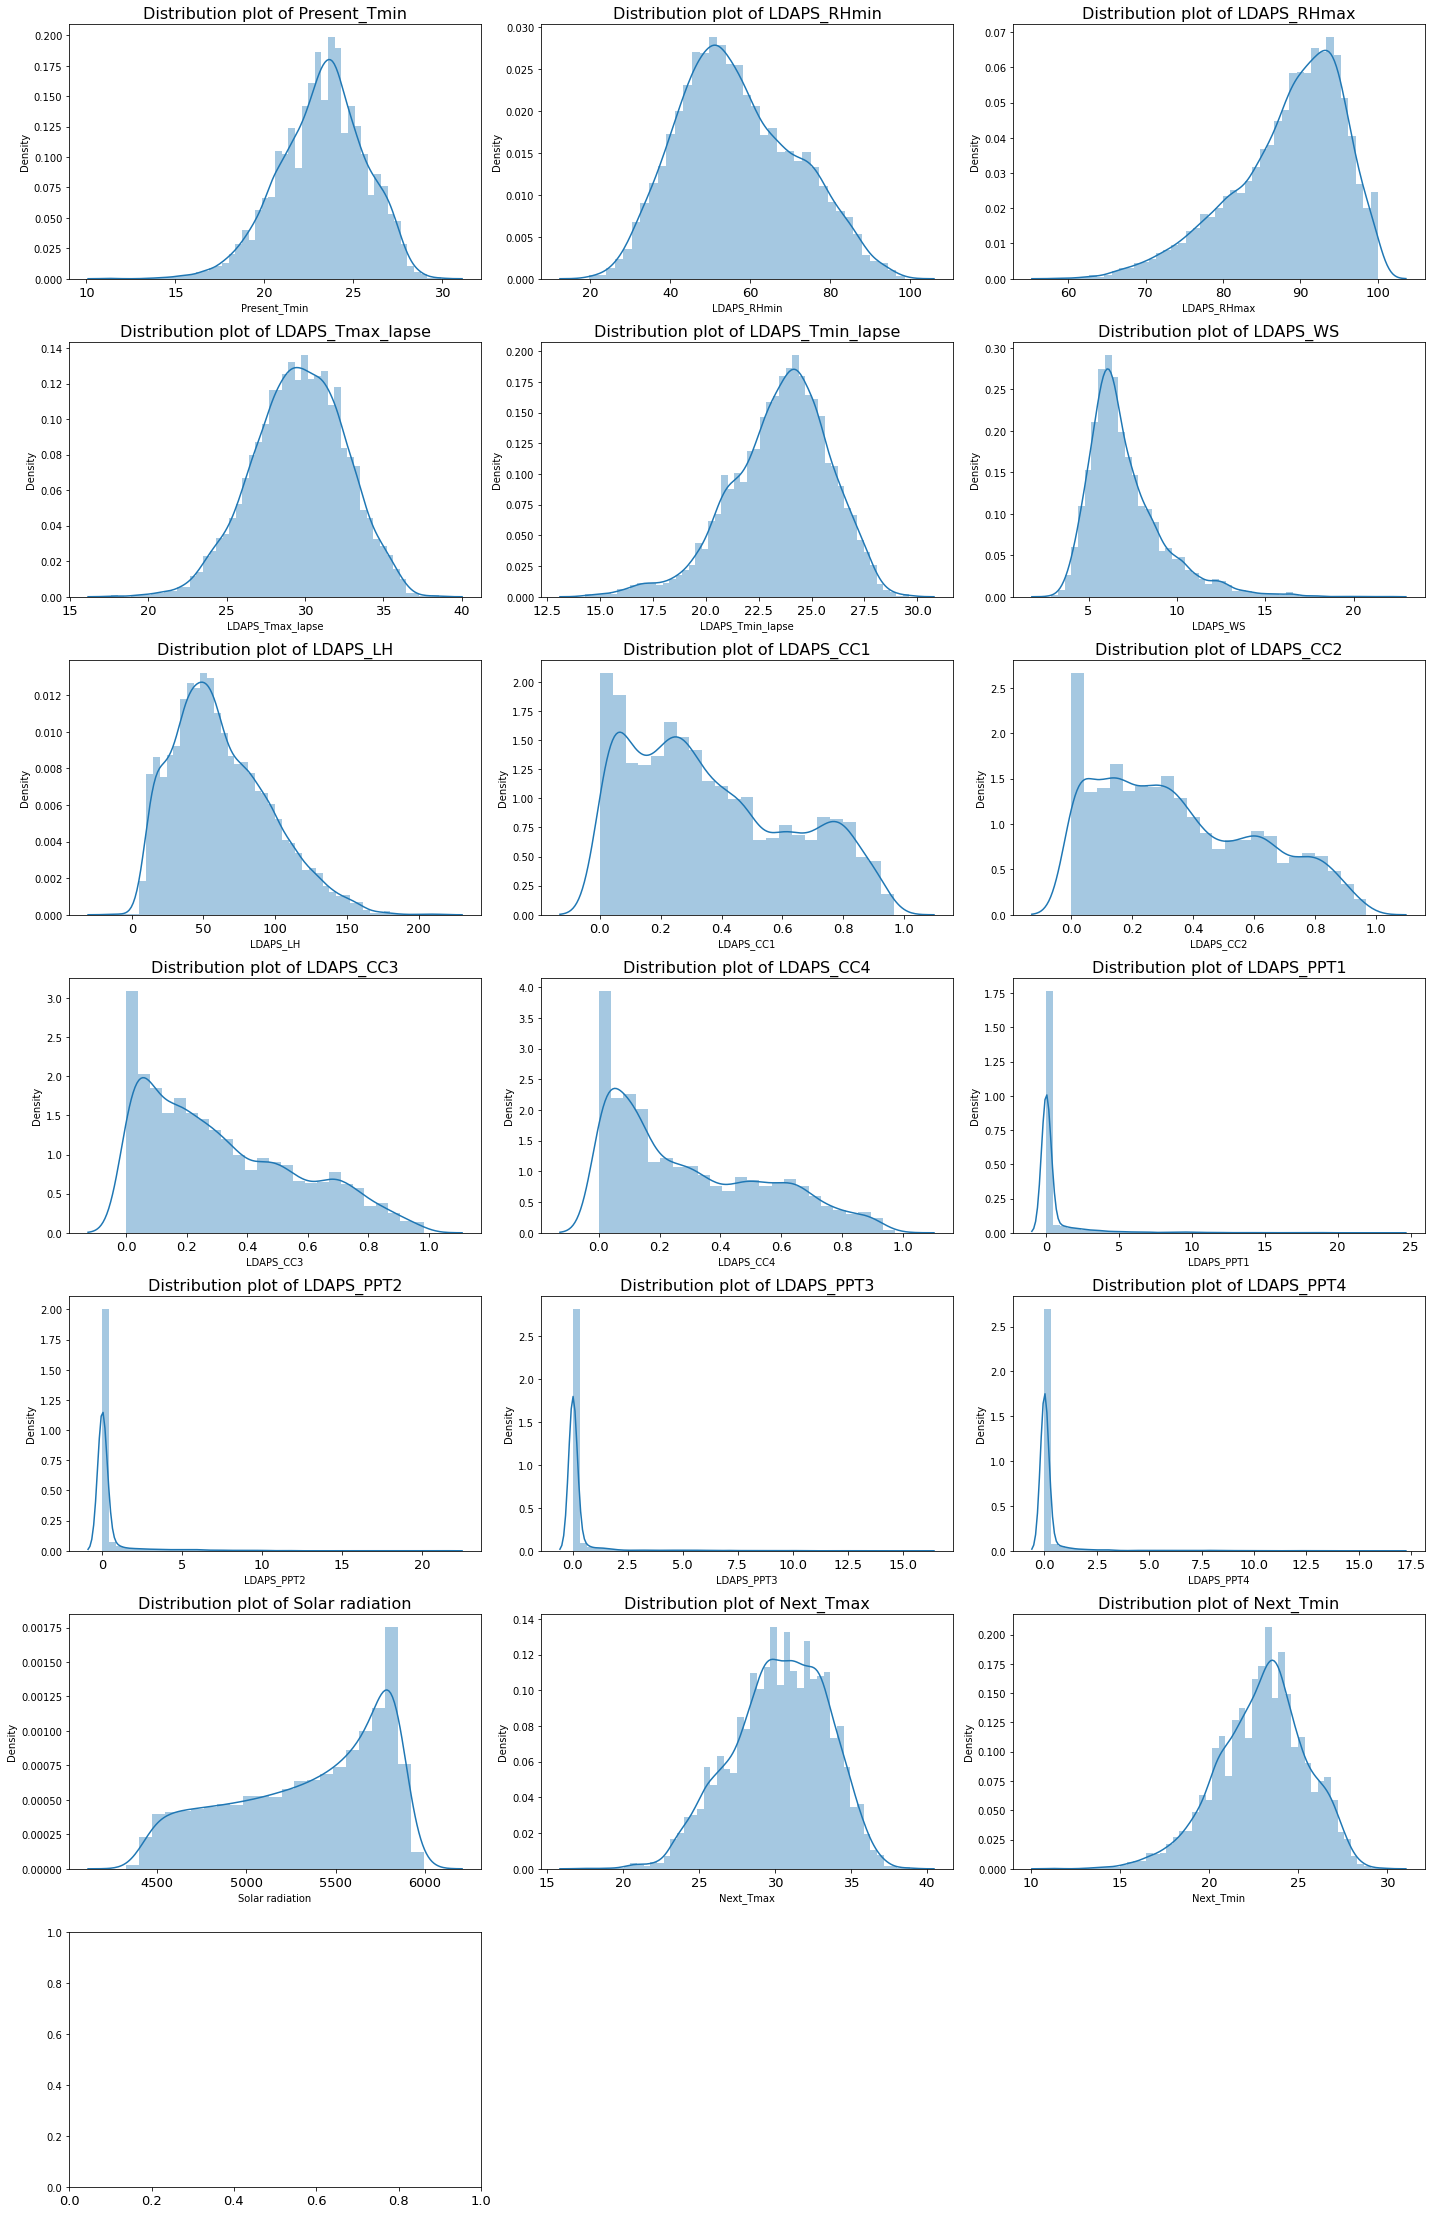

In [20]:
plt.figure(figsize=(20,35))
for i in range(len(col1)):
    sns.distplot(data[col1[i]])
    plt.title(f"Distribution plot of {col1[i]}",fontsize=16)
    plt.subplot(8,3,i+1)
    plt.xticks(fontsize=13)
    plt.tight_layout()

# Obseravtion

1-From Minimum air temperature between 0 and 21 h on the present day (Â°C):i can say it is left skewed and the range of it is between 11.3 to 29.9 but mostly value lies between 17 to 29

2-From LDAPS model forecast of next-day minimum relative humidity (%):i can say it has a little right peak its value is between 19.8 to 98.5

3-From LDAPS model forecast of next-day maximum relative humidity (%): i can say it is totally left skewed and its value is between 58.9 to 100 but in data its mostly range between 75-100

4-From LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): i can say it is little left skewed but almost noramlly distributed its value range is between 17.6 to 38.5 but in data most of the valued lies between 25-35

5-From LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): i can say it is left skewed and its value range is between 14.3 to 29.6 but in data most of the values lies between 20-27.5

6-From LDAPS model forecast of next-day average wind speed (m/s):i can say it is right skewed and its value range is between 2.9 to 21.9 but mostly values in data lies in 4-10

7-From LDAPS model forecast of next-day average latent heat flux (W/m2):i can say it is right skewed and its value range is between -13.6 to 213.4 but most of the values lies between 0-125

8-LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

From above all the columns i can say all four column are right skewed and having middle peak also

9-LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

From there four features i can say these all are having right peak only

10-Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

all these three columns are right skewed

# Bivariate Analysis

In [21]:
data1=data.groupby('City')[['Next_Tmax','Next_Tmin']].max()
data1=data1.reset_index()
data1=data1.sort_values(by=('Next_Tmax'),ascending=False)
data2=data.groupby('City')[['Next_Tmax','Next_Tmin']].max()
data2=data2.reset_index()
data2=data2.sort_values(by=('Next_Tmin'),ascending=True)

Text(0.5, 1.0, 'City wise minimum temperature')

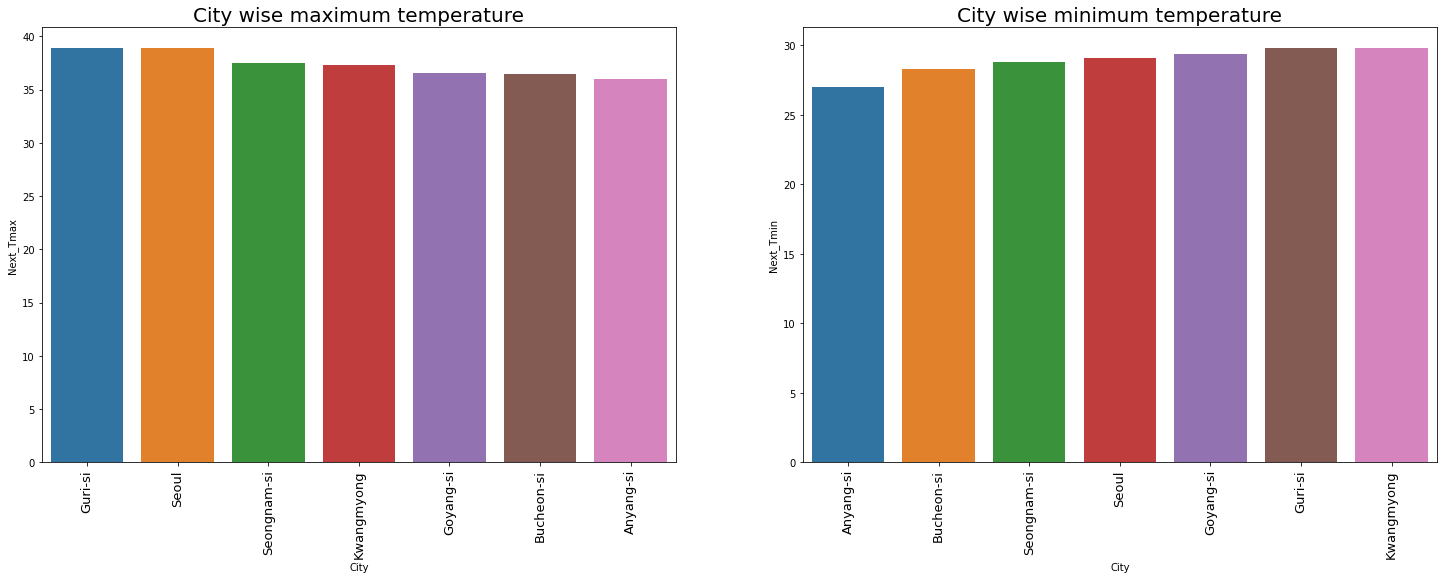

In [22]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.barplot(x=data1['City'],y=data1['Next_Tmax'])
plt.xticks(rotation=90,fontsize=13)
plt.title("City wise maximum temperature",fontsize=20)
plt.subplot(1,2,2)
sns.barplot(x=data2['City'],y=data2['Next_Tmin'])
plt.xticks(rotation=90,fontsize=13)
plt.title("City wise minimum temperature",fontsize=20)

# Obseravtion

1-From upper graph i can say guri-si and seoul has the highest temperature as comapre to other but rest of them also count as highest temperature city

2-From minimum temperature city i can say aryang-si and bucheon-si has low temperatue but rest of all column have less temperature and all but these two have very less as compare to other

In [23]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,state,City,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,Seoul,Seoul,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,Seoul,Seoul,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,Seoul,Seoul,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,Seoul,Seoul,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,Gyeonggi-do,Guri-si,2013.0,6.0,30.0


In [24]:
data3=data.groupby('state')[['Next_Tmax','Next_Tmin']].max()
data3=data3.reset_index()
data4=data.groupby('state')[['Next_Tmax','Next_Tmin']].min()
data4=data4.reset_index()

Text(0.5, 1.0, 'state wise minimum temperature')

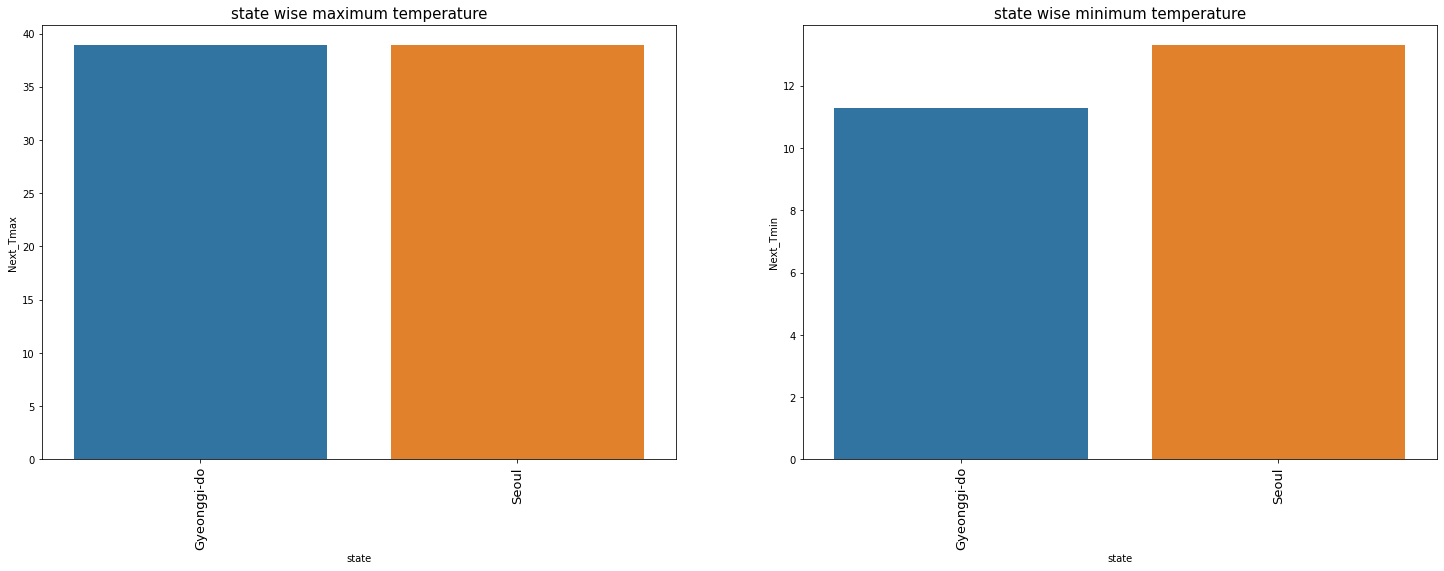

In [25]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.barplot(x=data3['state'],y=data3['Next_Tmax'])
plt.xticks(rotation=90,fontsize=13)
plt.title("state wise maximum temperature",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x=data4['state'],y=data4['Next_Tmin'])
plt.xticks(rotation=90,fontsize=13)
plt.title("state wise minimum temperature",fontsize=15)

# Obseravtion

1-From upper graph i can say maximun temperature of both state is 38.9

2-And for minimum temp bth are having 17.4

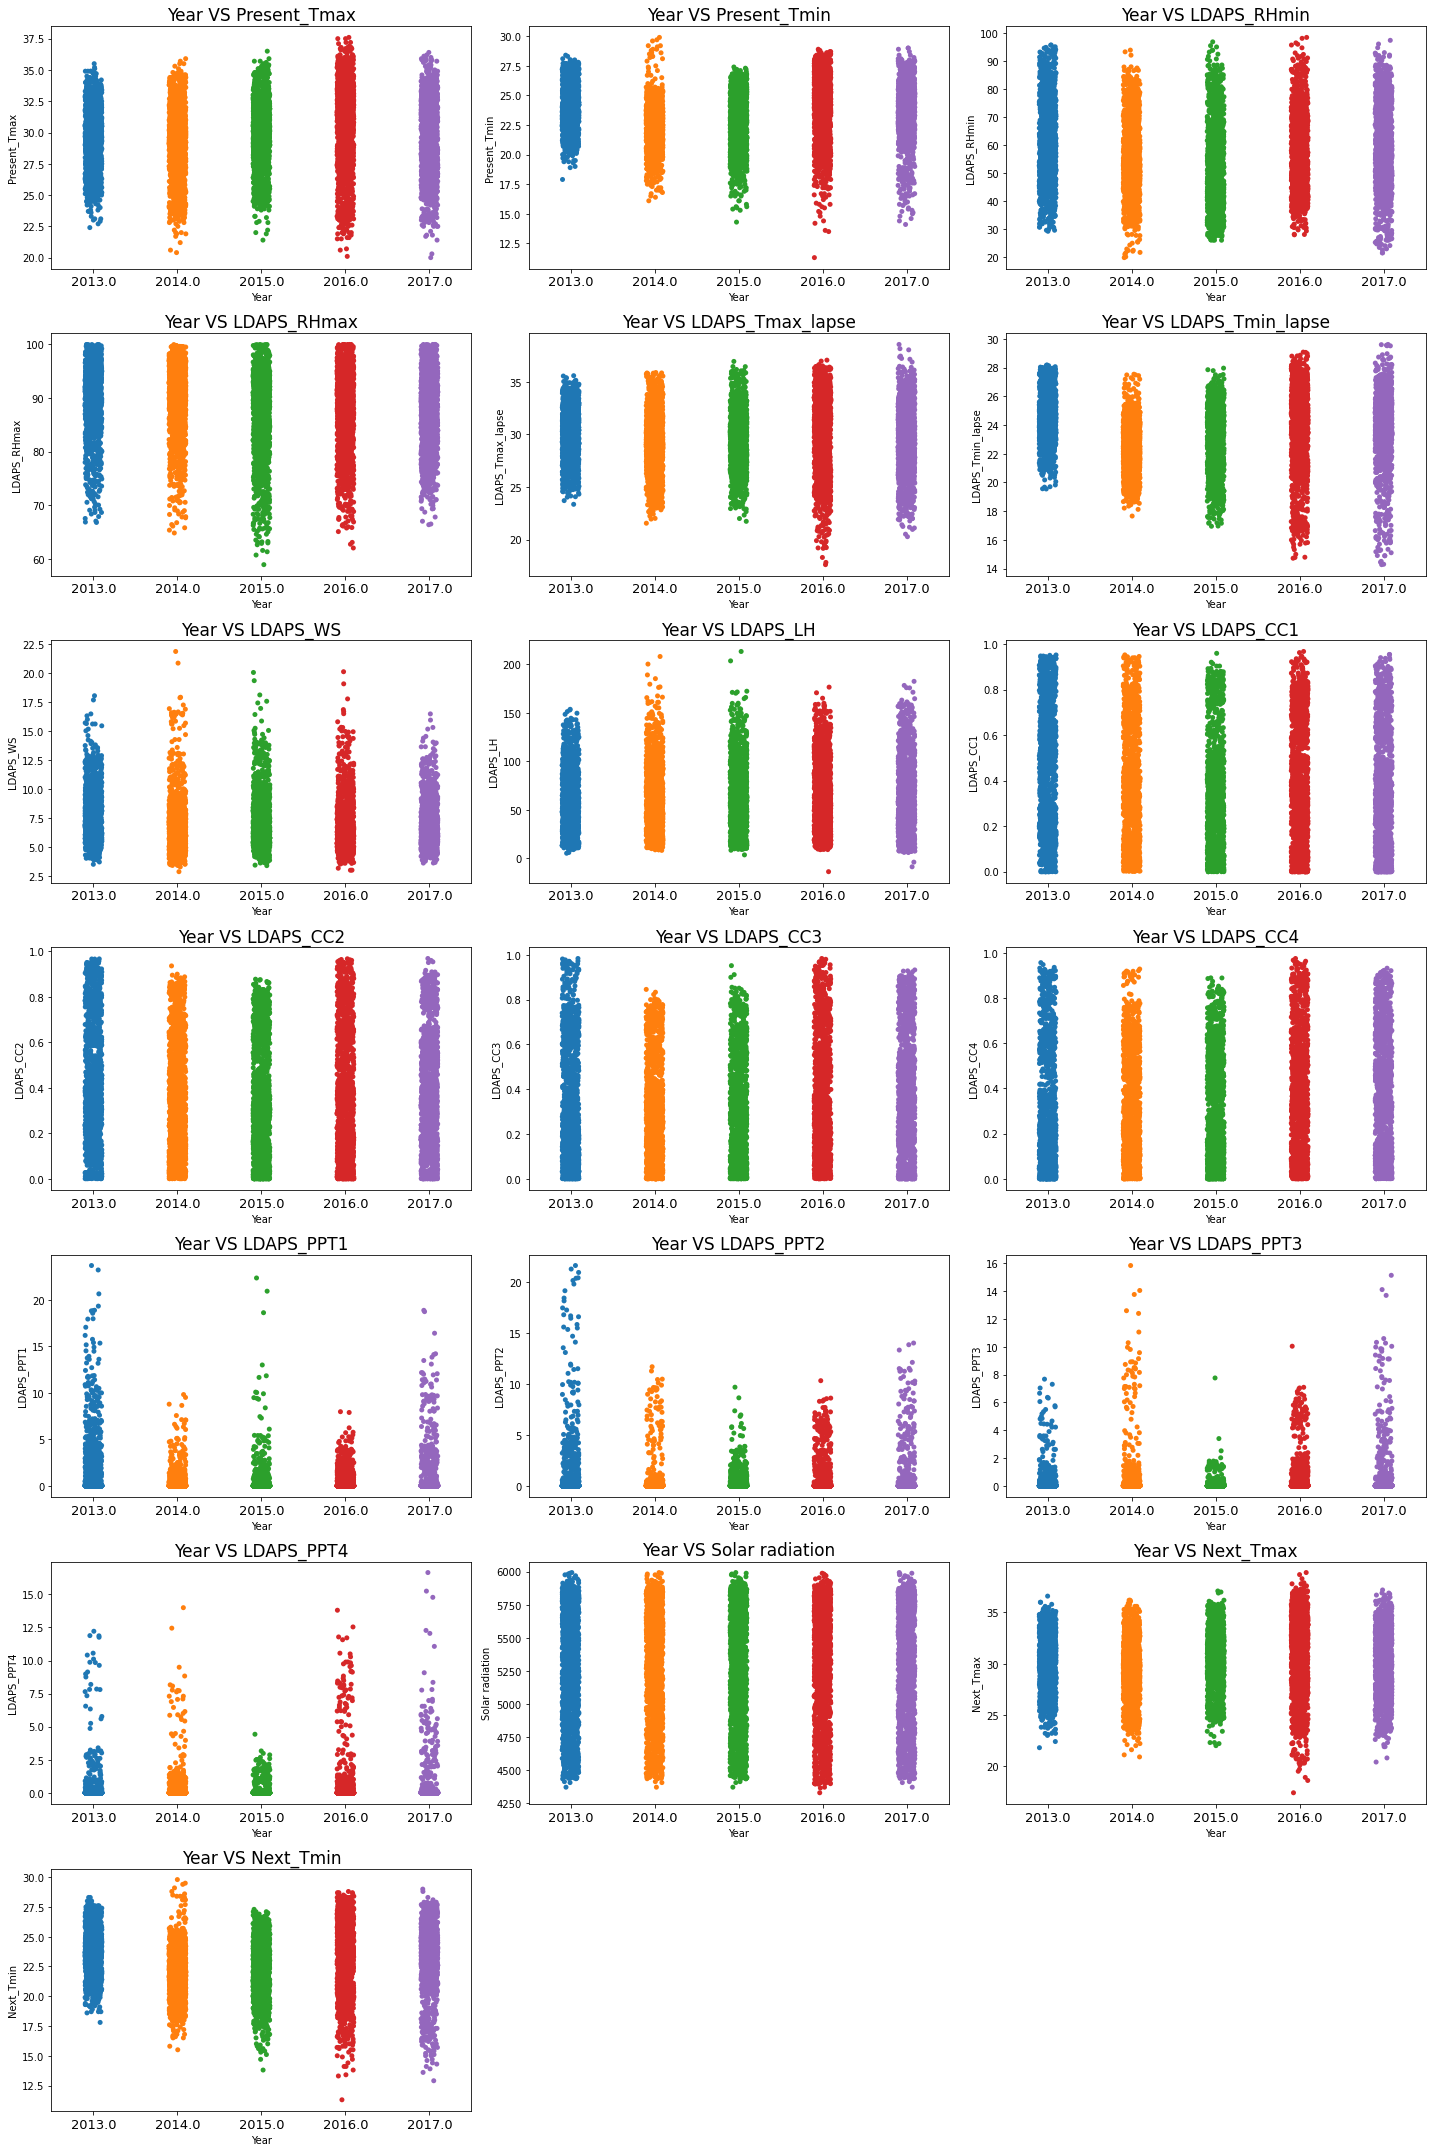

In [26]:
plt.figure(figsize=(20,30))
for i in range(len(col1)):
    plt.subplot(7,3,i+1)
    sns.stripplot(x=data['Year'],y=data[col1[i]])
    plt.title(f"Year VS {col1[i]}",fontsize=17)
    plt.xticks(fontsize=13)
    plt.tight_layout()

# Obseravtion

1-From Year vs Maximum air temperature between 0 and 21 h on the present day i can say 2016 has the highest temperature

2-From year vs Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9 i can say 2017 and 2016 has the minimum temperature

3-From year vs LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5 i can say 2014 and 2017 has the minimum humidity

4-From Year vs LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100 i can say all year has same count

5-From Year vs LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5 i can say 2016 and 2017 has the highest lapse rate

6-From year vs LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6 i can say minimum air temperature was in 2016 and 2017

7-From year vs LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9 and LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4 has the highest value in 2014 and 2015

8-From Year vs LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97 i can say maximum value was on 2013 and 2014

9-From year vs LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97 the maximum value was on 2013 and 2016 year

10-From year vs LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98 i can say max value was in 2013 and 2016

11-from year vs LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97 has the max value on 2013 and 2016

12-From year vs LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7 i can say 2013 and 2017 has the highest value

13-From year vs LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6 i can say 2013 and 2017 has the highest value

14-From year vs LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8 i can say 2014 and 2017 has the highest count

15-From year vs LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7 i can say 2016 and 2017 has the highest count

In [27]:
col2=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']

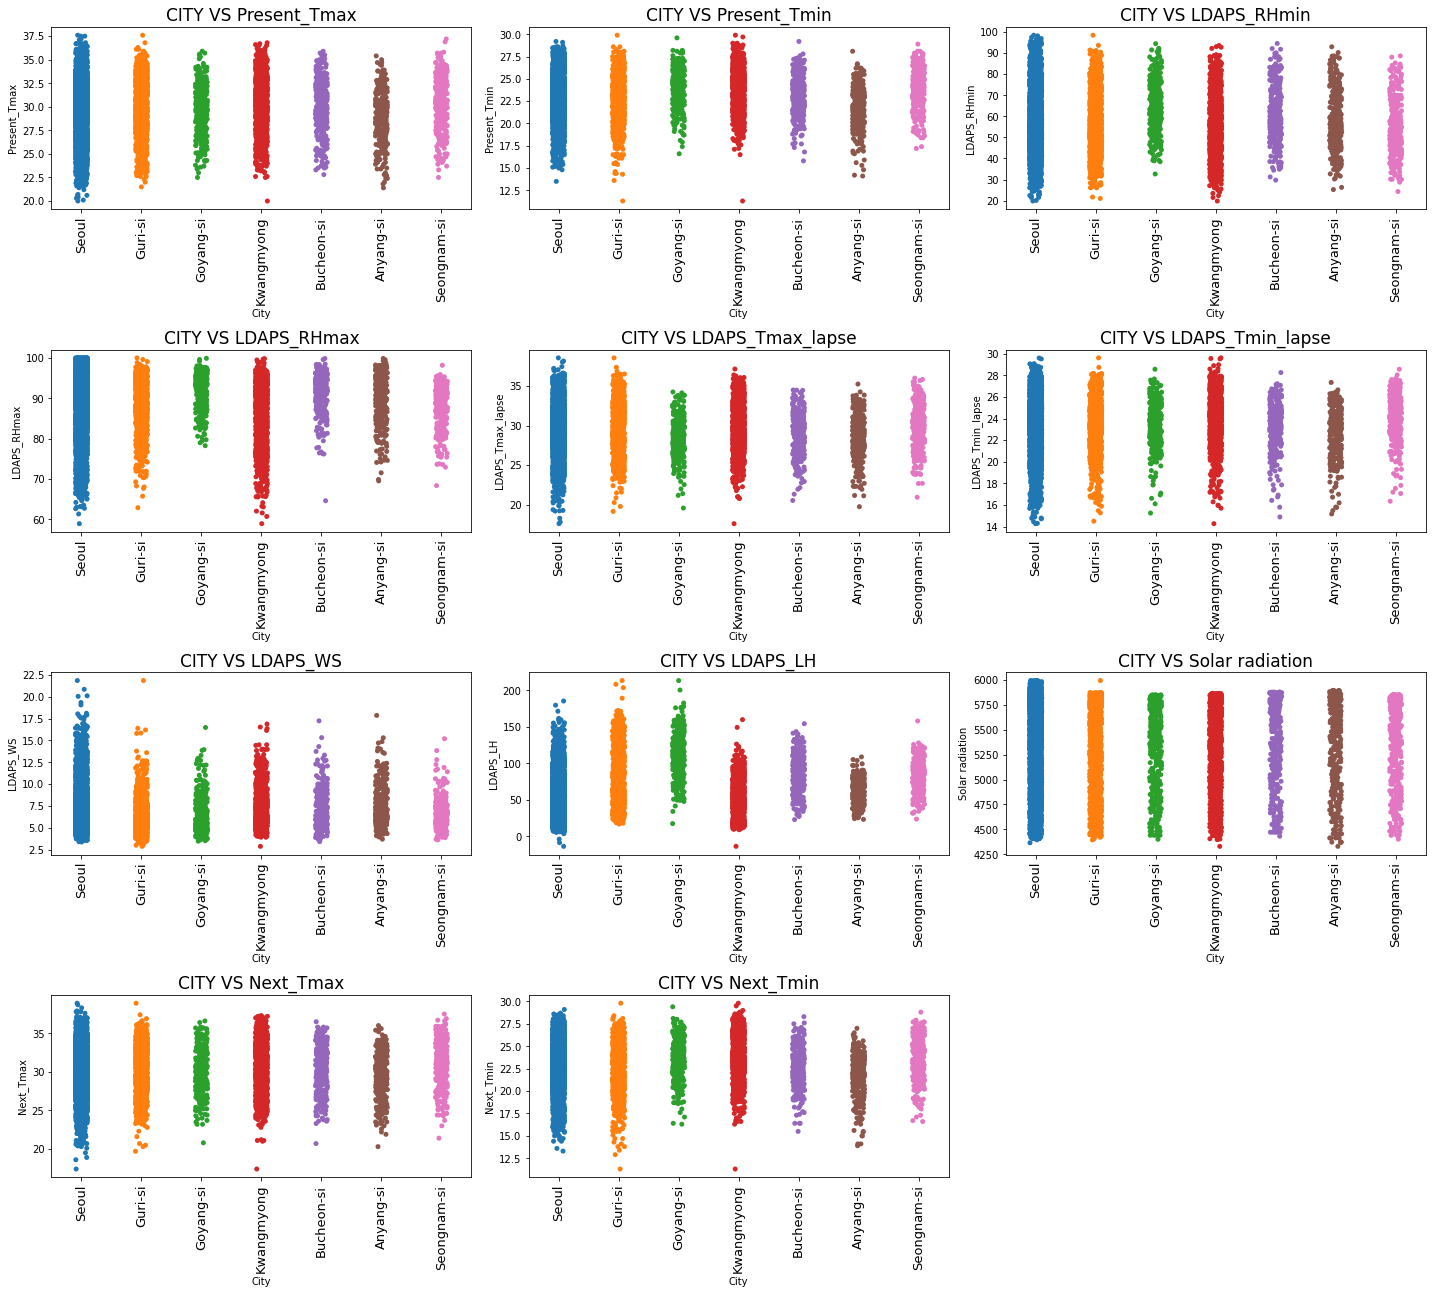

In [28]:
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(7,3,i+1)
    sns.stripplot(x=data['City'],y=data[col2[i]])
    plt.title(f"CITY VS {col2[i]}",fontsize=17)
    plt.xticks(fontsize=13,rotation=90)
    plt.tight_layout()

# Observation

1-From City vs present tmax i can say seoul and guri-si has the highest temperature

2-From City vs tmin i can say Seoul and guri-si has the min temp also

3-From city vs LDAPS model forecast of next-day minimum and maximum relative humidity i can say seoul and kwangmtong has the min temperature as well as maximum temperature

4-From city vs LDAPS model forecast of next-day maximum air temperature applied lapse rate i can say that seoul and guri-si has the min and max values

5-From city vs LDAPS model forecast of next-day average wind speed i can say swoul and guri-si has the max value

6-From city vs LDAPS model forecast of next-day average latent heat flux i can say that guri-si and goyang-si

7-From City vs solar radiation i can say seoul has the highest rate

8-From upper graph i can say guri-si and seoul has the highest temperature as comapre to other but rest of them also count as highest temperature city

9-From minimum temperature city i can say aryang-si and bucheon-si has low temperatue but rest of all column have less temperature and all but these two have very less as compare to other

# Preprocessing

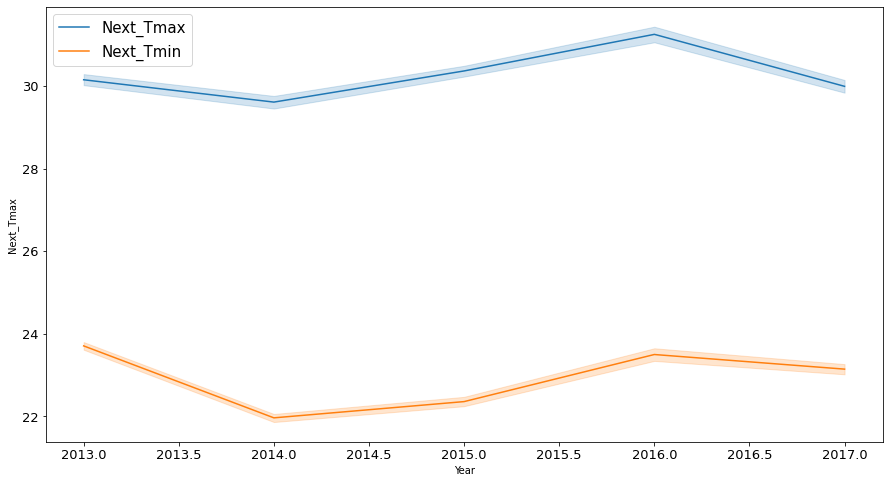

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Next_Tmax',data=data)
sns.lineplot(x='Year',y='Next_Tmin',data=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Next_Tmax','Next_Tmin'],fontsize=15)
plt.show()

# Observation

by seeing upper graph i can say maximum tmax was in 2016 and min tmin was in 2014

and temperature is reducing and increasing its not constant per time this is how it should be because is real time temperature is always increasing but we have only 2 state of data here so it is showly according to that only

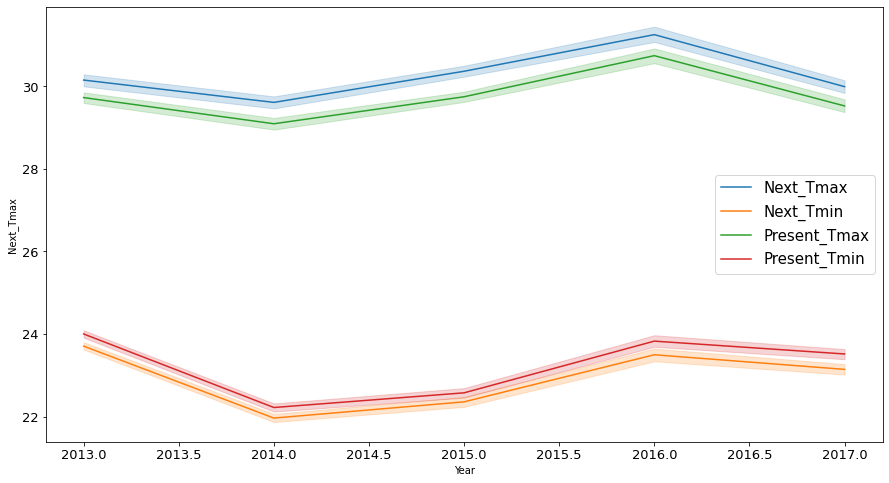

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Next_Tmax',data=data)
sns.lineplot(x='Year',y='Next_Tmin',data=data)
sns.lineplot(y='Present_Tmax',x='Year',data=data)
sns.lineplot(y='Present_Tmin',x='Year',data=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Next_Tmax','Next_Tmin','Present_Tmax','Present_Tmin'],fontsize=15)
plt.show()

# Obseravtion

From Present day vs next day maximum temperature i can say temperature on next day is high as comapre to present day

From Present day vs next day min temperature i can say temperature on next day is min as comapre to present day

In [31]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,state,City,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,Seoul,Seoul,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,Seoul,Seoul,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,Seoul,Seoul,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,Seoul,Seoul,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,Gyeonggi-do,Guri-si,2013.0,6.0,30.0


In [32]:
data.isna().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
state                0
City                 0
Year                 2
Month                2
Day                  2
dtype: int64

# Feature Transformation

In [33]:
#Using ordinal encoder because every column is having values in order

oe=OrdinalEncoder()
def ordinal_encoder(df,column):
    df=df.copy()
    df[column]=oe.fit_transform(df[column])
    return df

In [34]:
data=ordinal_encoder(data,['City','state'])

# Preprocessing

In [35]:
def preprocess(df):
    df=df.copy()
    for column in ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']:
        df[column]=df[column].fillna(df[column].mean())
    for column in ['Year','Month','Day','station']:
        df[column]=df[column].fillna(df[column].mode()[0])
    X=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
    y=df[['Next_Tmax','Next_Tmin']]
    return X,y

For continuous value i have filled it by means and for categorical value i have filled it by mode

In [36]:
X,y=preprocess(data)

Spliting data into X,y X for independent variable and y for dependent variable

In [37]:
x=X

<AxesSubplot:>

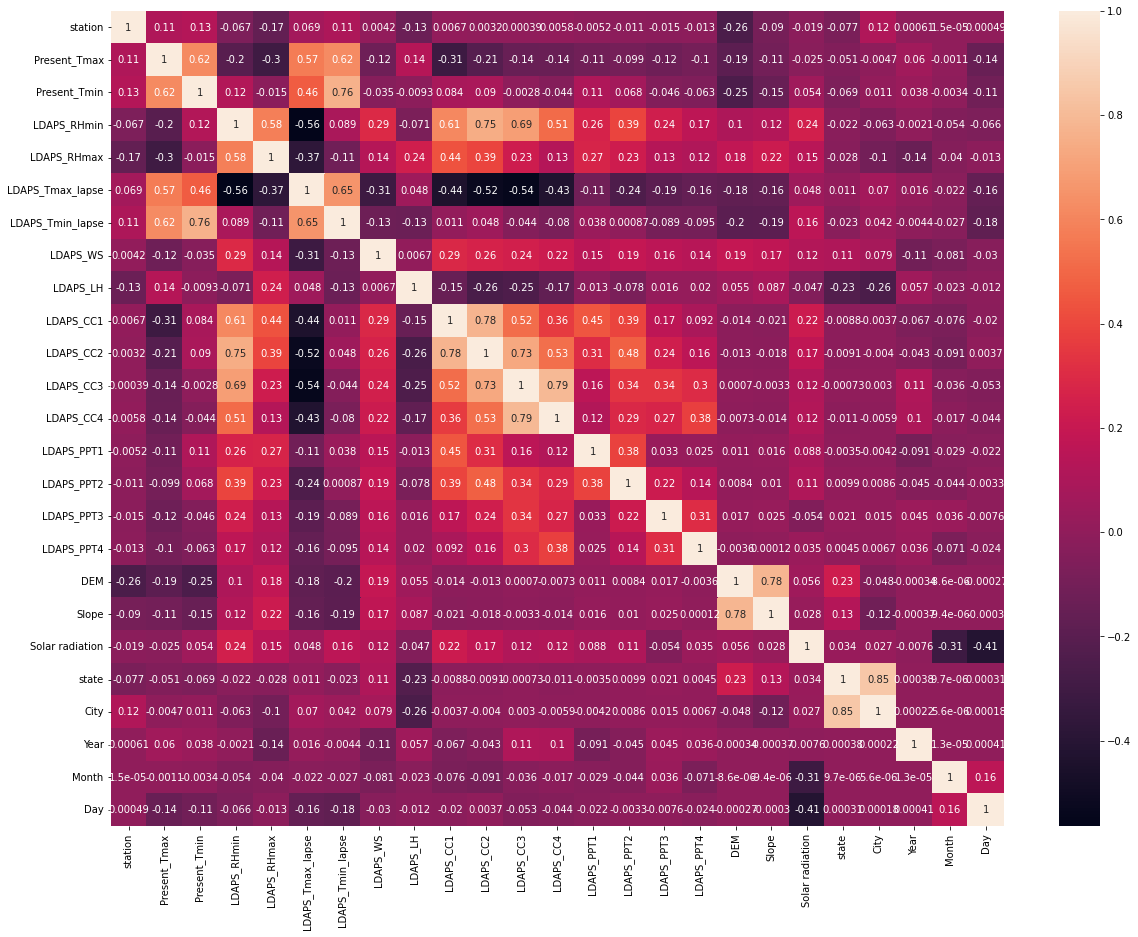

In [38]:
X_corr=X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(X_corr,annot=True)

From upper plot i can say many columns have good correlation no such column have high correlation so no need to apply pca and no need to drop any column

# Checking Outliers

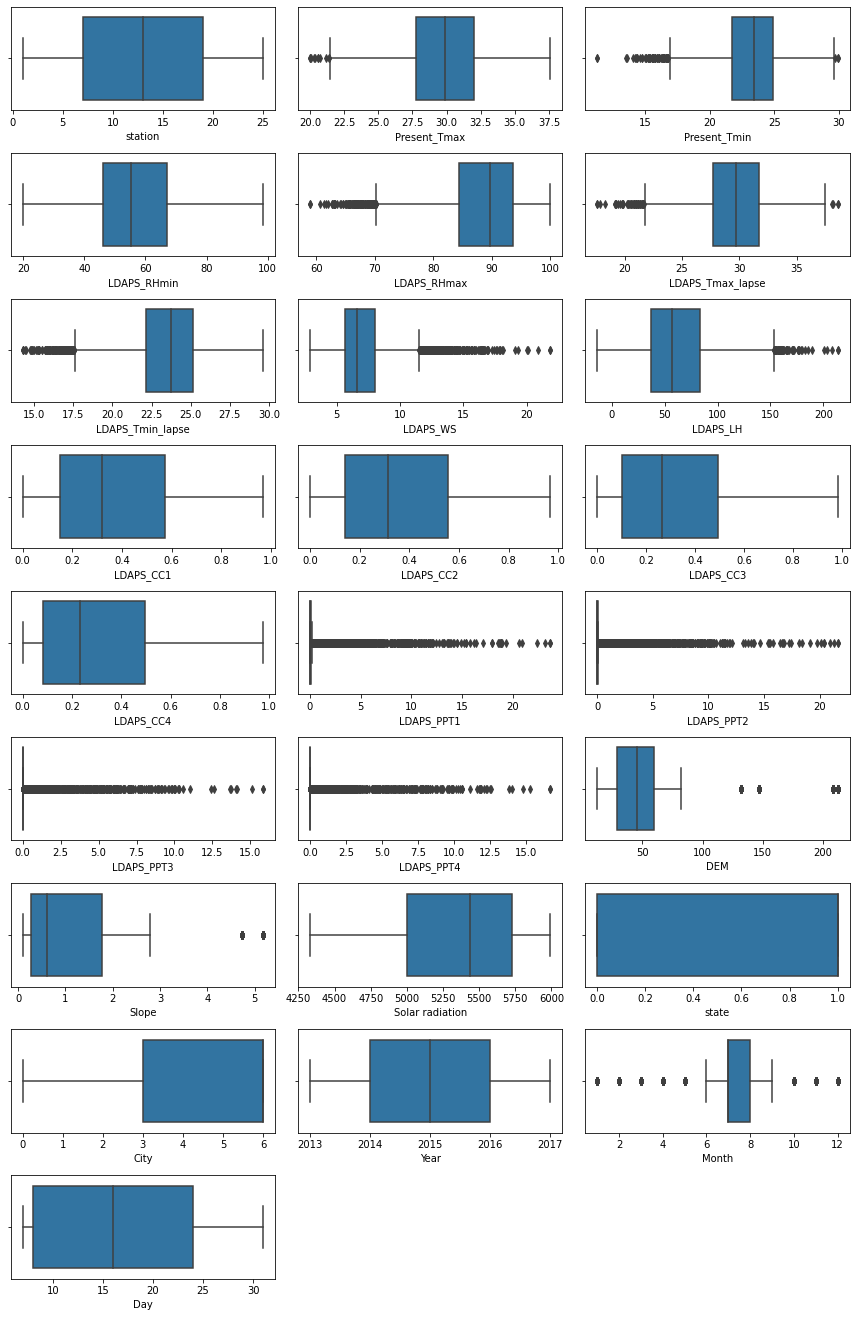

In [39]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
    plt.subplot(10,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

this data has lots of outliers so, lets try to remove them

# Removing outliers by percentile method So i will not loose data

In [40]:
for col in X.columns:
    percentile=X[col].quantile([0.01,0.98]).values
    X[col][X[col]<percentile[0]]=percentile[0]
    X[col][X[col]>=percentile[1]]=percentile[1]

# Checking outliers after removing

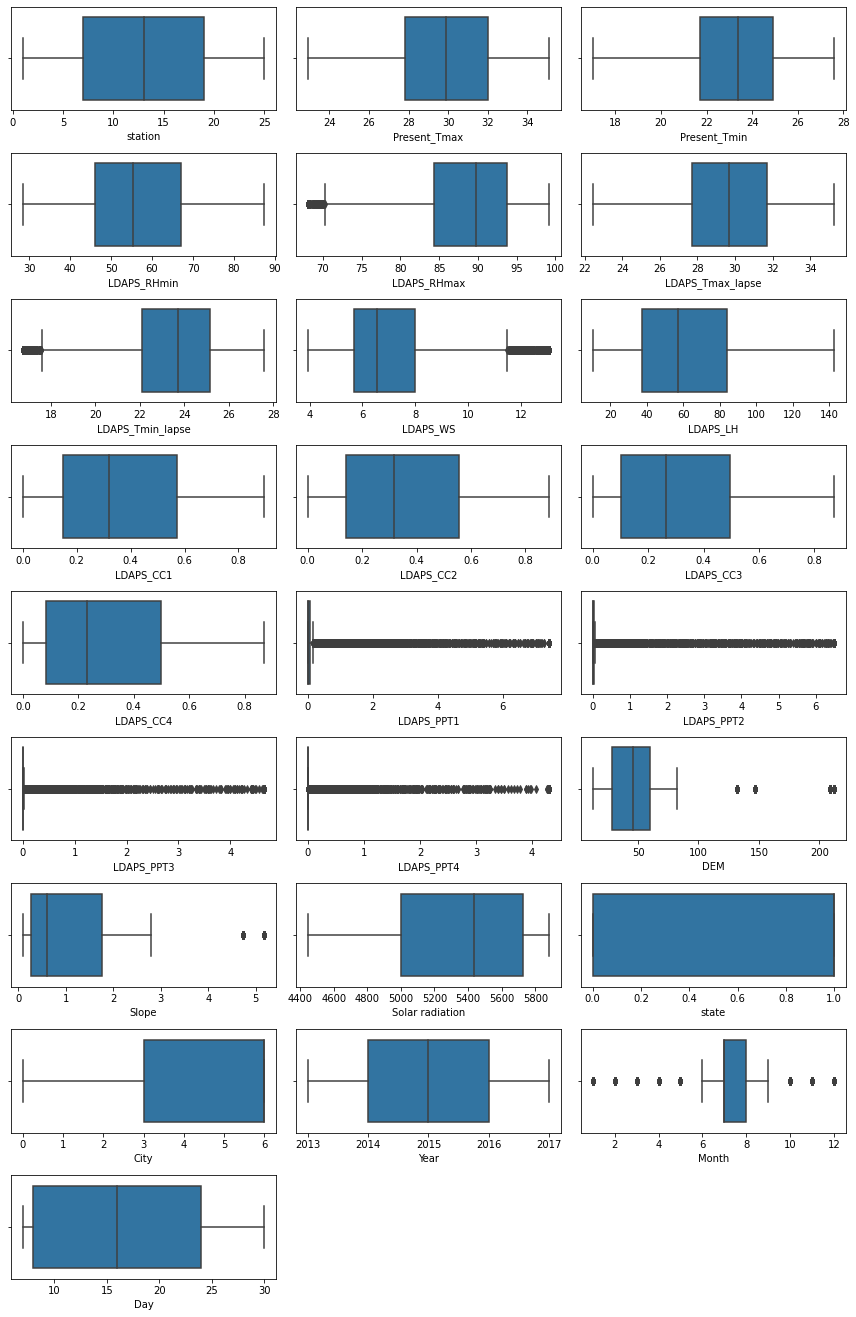

In [41]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
    plt.subplot(10,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

Many outliers have been removed

# Checking skewness

In [43]:
X.skew()

station             0.000100
Present_Tmax       -0.273084
Present_Tmin       -0.303162
LDAPS_RHmin         0.267646
LDAPS_RHmax        -0.800134
LDAPS_Tmax_lapse   -0.189852
LDAPS_Tmin_lapse   -0.550108
LDAPS_WS            1.114297
LDAPS_LH            0.546838
LDAPS_CC1           0.444996
LDAPS_CC2           0.451103
LDAPS_CC3           0.604213
LDAPS_CC4           0.643015
LDAPS_PPT1          3.534597
LDAPS_PPT2          3.719570
LDAPS_PPT3          4.524134
LDAPS_PPT4          4.543390
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.515178
state              -0.079542
City               -0.967212
Year                0.000365
Month              -0.705303
Day                 0.236834
dtype: float64

This data has many columns that have skewness

In [44]:
import scipy

In [45]:
skew_df=pd.DataFrame(X.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature:scipy.stats.skew(X[feature]))
skew_df['Absolute_skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute_skew'].apply(lambda x:True if x>=0.5 else False)
skew_df

,Feature,Skew,Absolute_skew,Skewed
0,station,0.000100,0.000100,False
1,Present_Tmax,-0.273031,0.273031,False
2,Present_Tmin,-0.303104,0.303104,False
3,LDAPS_RHmin,0.267594,0.267594,False
4,LDAPS_RHmax,-0.799980,0.799980,True
5,LDAPS_Tmax_lapse,-0.189815,0.189815,False
6,LDAPS_Tmin_lapse,-0.550002,0.550002,True
7,LDAPS_WS,1.114082,1.114082,True
8,LDAPS_LH,0.546733,0.546733,True
9,LDAPS_CC1,0.444910,0.444910,False


# Removing Skewness by power_transform

In [46]:
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [47]:
X_new.skew()

station            -0.204739
Present_Tmax       -0.049570
Present_Tmin       -0.032870
LDAPS_RHmin        -0.022682
LDAPS_RHmax        -0.121049
LDAPS_Tmax_lapse   -0.026554
LDAPS_Tmin_lapse   -0.041812
LDAPS_WS            0.025665
LDAPS_LH           -0.059849
LDAPS_CC1           0.045410
LDAPS_CC2           0.043534
LDAPS_CC3           0.085732
LDAPS_CC4           0.125332
LDAPS_PPT1          1.392717
LDAPS_PPT2          1.562398
LDAPS_PPT3          1.723208
LDAPS_PPT4          1.934279
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.182605
state              -0.079542
City               -0.507085
Year               -0.000108
Month               0.043843
Day                -0.043510
dtype: float64

Skewness is removed

# Feature Scaling

In [48]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

using train test split to split data for machine learning

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

# Training Multiple Model

In [50]:
models={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso()  
}

************************************************ ExtraTreesRegressor *****************************************************
MEAN SQUARED ERROR 0.6458295745318663


MEAN ABSOLUTE ERROR 0.5941302248119609


CVS_SCORE 0.920011780351009


R2_SCORE 0.9178063493111674


RMSE 0.803635224795346


MODEL PERFORMANCE CURVE


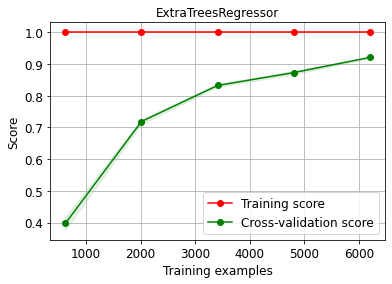

************************************************ RandomForestRegressor *****************************************************
MEAN SQUARED ERROR 0.8091204137070767


MEAN ABSOLUTE ERROR 0.6749748828356518


CVS_SCORE 0.8997396426069966


R2_SCORE 0.8980105800602923


RMSE 0.8995112082164828


MODEL PERFORMANCE CURVE


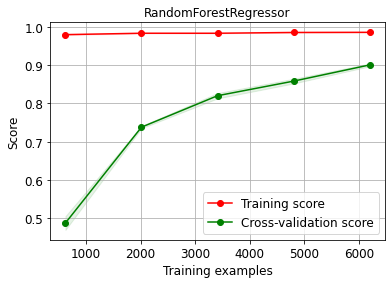

************************************************ LinearRegression *****************************************************
MEAN SQUARED ERROR 1.7268974825008143


MEAN ABSOLUTE ERROR 0.9844955024912874


CVS_SCORE 0.7879362309895055


R2_SCORE 0.7910746411928324


RMSE 1.3141147143612746


MODEL PERFORMANCE CURVE


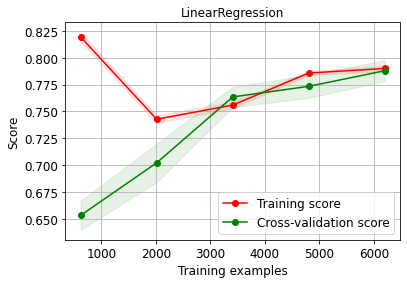

************************************************ DecisionTreeRegressor *****************************************************
MEAN SQUARED ERROR 1.8982655461120355


MEAN ABSOLUTE ERROR 0.9908442789682954


CVS_SCORE 0.7718378696230339


R2_SCORE 0.7617102155120852


RMSE 1.3777755790084376


MODEL PERFORMANCE CURVE


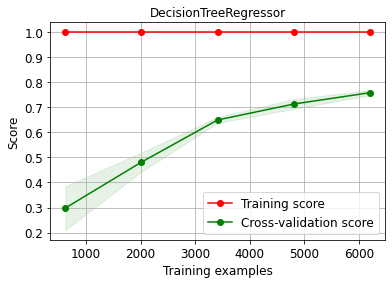

************************************************ Lasso *****************************************************
MEAN SQUARED ERROR 3.268798469050693


MEAN ABSOLUTE ERROR 1.3999011729632953


CVS_SCORE 0.5958405490583839


R2_SCORE 0.5951436906832857


RMSE 1.8079818774121308


MODEL PERFORMANCE CURVE


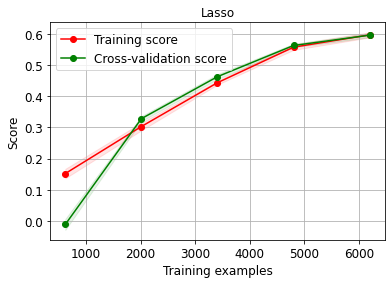

In [51]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
    print("************************************************",name,"*****************************************************")
    NAME.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    MSE.append(mse)
    print("MEAN SQUARED ERROR",mse)
    mae=mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    print('\n')
    print("MEAN ABSOLUTE ERROR",mae)
    cvs=cross_val_score(model,X_new,y,scoring='r2',cv=kf).mean()
    CVS.append(cvs)
    print('\n')
    print("CVS_SCORE",cvs)
    r2=r2_score(y_test,y_pred)
    R2.append(r2)
    print('\n')
    print("R2_SCORE",r2)
    rmse=np.sqrt(mse)
    RMSE.append(rmse)
    print('\n')
    print("RMSE",rmse)
    print('\n')
    print('MODEL PERFORMANCE CURVE')
    skplt.estimators.plot_learning_curve(model,X_new,y,cv=kf,scoring='r2',title=name,text_fontsize='large')
    plt.show()

Converting all the result into df so that i can choose the right model

In [52]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [53]:
models_result

,NAME,Cross_Val_Score,R2_score,Mean_squared_error,Mean_Absolute_Error,RMSE
0,ExtraTreesRegressor,0.920012,0.917806,0.645830,0.594130,0.803635
1,RandomForestRegressor,0.899740,0.898011,0.809120,0.674975,0.899511
2,LinearRegression,0.787936,0.791075,1.726897,0.984496,1.314115
3,DecisionTreeRegressor,0.771838,0.761710,1.898266,0.990844,1.377776
4,Lasso,0.595841,0.595144,3.268798,1.399901,1.807982


# We will choose ExtraTrees as it is giving us good metrics result and cross_val_score

In [54]:
ETree=ExtraTreesRegressor()

# Hyperparameter Tuning

In [55]:
params={
 'bootstrap': [False,True],
 'max_depth': [None,1,2,3],
 'min_samples_leaf': [1,2,3,4],
 'min_samples_split': [2,3,4],
 'n_estimators':[100,200,500]
}

In [56]:
Grid=GridSearchCV(estimator=ETree,param_grid=params,scoring='r2',n_jobs=-1,cv=kf)

In [57]:
Grid.fit(X_new,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

In [58]:
Grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [59]:
Grid.best_score_

0.9218471131091908

accuracy increased by 92.00 to 92.18

In [60]:
Extra=ExtraTreesRegressor(bootstrap= False,
 max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 500)

# Final Model Learning Curve

MODEL PERFORMANCE CURVE


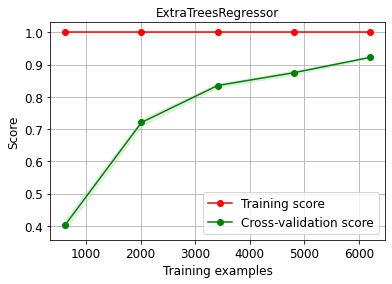

In [61]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(Extra,X_new,y,cv=kf,scoring='r2',title='ExtraTreesRegressor',text_fontsize='large')
plt.show()

In [62]:
Extra.fit(X_train,y_train)
y_predicted=Extra.predict(X_test)

# Final Model Metrics

In [63]:
print("Mean Squared Error",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predicted)))
print("R2 Score",r2_score(y_test,y_predicted))

Mean Squared Error 0.6374270550726627
Mean Absolute Error 0.5903360650755372
RMSE 0.7983902899413686
R2 Score 0.9189520159228917


# Saving Model

In [64]:
import joblib
joblib.dump(Grid,"Temperature_prediction_model.obj")

['Temperature_prediction_model.obj']

# Loading Model

In [65]:
model=joblib.load('Temperature_prediction_model.obj')

In [66]:
model.predict(X_test)

array([[28.3, 20.3],
       [35.9, 27.5],
       [25.3, 21.2],
       ...,
       [32.3, 25. ],
       [26.8, 22.1],
       [29.1, 22.5]])

# Conclusion

1-In this data we have to predict the temperature

2-I did lot of EDA in this data and gives my obseravtion as well

3-I have performed all the steps of data science life cycle in this project data preprocessing--data cleaning--Feature Engineering--Feature selection--Feature Transformation--Model Building

4-At the End i have build a model with 92.14 accuracy

5-Finally i saved the model for future prediction